In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
file1="bank_loan_data.csv"

In [26]:
loan_df=pd.read_csv(file1)
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
num_col=loan_df.select_dtypes(exclude='object')
num_col.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [5]:
len(loan_df['ApplicantIncome'])

614

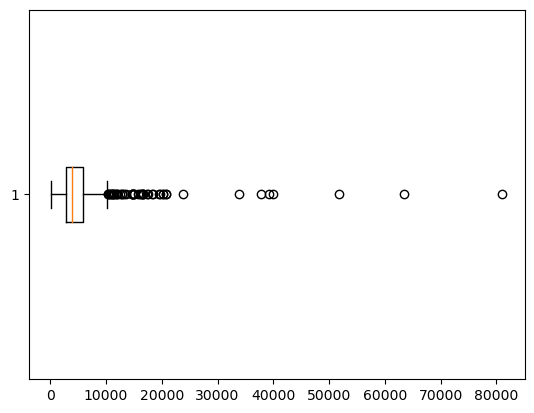

In [6]:
box=plt.boxplot(loan_df['ApplicantIncome'],vert=False)

In [7]:
num_col.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

## skew plot

In [22]:
loan_df['ApplicantIncome'].skew()

6.539513113994625

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


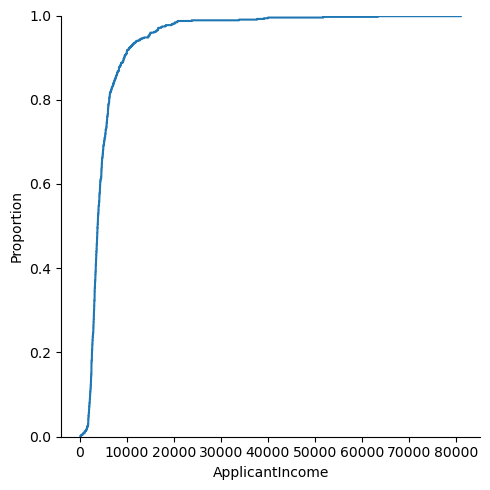

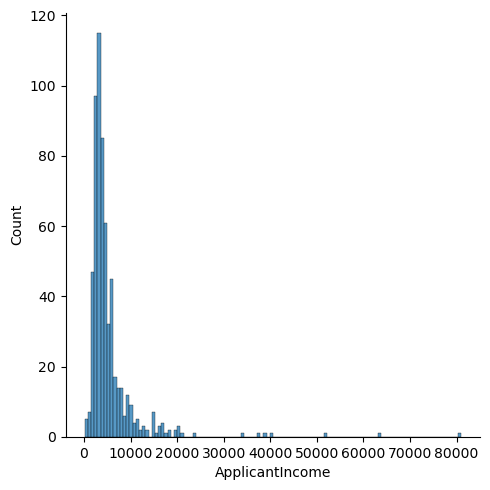

In [29]:
sns.displot(loan_df['ApplicantIncome'],kind='ecdf ')
sns.displot(loan_df['ApplicantIncome'])

## proced to find the outliers

## step-1

In [8]:
Q1=np.quantile(loan_df ['ApplicantIncome'],0.25)
Q2=np.quantile(loan_df ['ApplicantIncome'],0.50)
Q3=np.quantile(loan_df ['ApplicantIncome'],0.75)

In [9]:
Q1,Q2,Q3

(2877.5, 3812.5, 5795.0)

## step-2
## calulate IQR =(Q3-Q1)

In [10]:
IQR=Q3-Q1
IQR

2917.5

## step-3

In [11]:
upper_bond=Q3+1.5*IQR
lower_bond=Q1-1.5*IQR

In [12]:
upper_bond,lower_bond

(10171.25, -1498.75)

In [13]:
con1=loan_df['ApplicantIncome']>upper_bond
con2=loan_df['ApplicantIncome']<lower_bond
con1,con2

(0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 609    False
 610    False
 611    False
 612    False
 613    False
 Name: ApplicantIncome, Length: 614, dtype: bool,
 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 609    False
 610    False
 611    False
 612    False
 613    False
 Name: ApplicantIncome, Length: 614, dtype: bool)

## otliers(col)

In [14]:
def outliers(col):
    q1=np.quantile(loan_df[col],0.25)
    q2=np.quantile(loan_df[col],0.50)
    q3=np.quantile(loan_df[col],0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    col1=loan_df[col]>ub
    col2=loan_df[col]<lb
    outliers_df=loan_df[col1|col2]
    print(f'{col} has {len(outliers_df)} outlier')
    #print(f"{} has {} outliers") #,format(col,len(outliers_df)))
for col in num_col:
    outliers(col)

ApplicantIncome has 50 outlier
CoapplicantIncome has 18 outlier
LoanAmount has 0 outlier
Loan_Amount_Term has 0 outlier
Credit_History has 0 outlier


## method-2

In [15]:
q1=np.quantile(loan_df['ApplicantIncome'],0.25)
q2=np.quantile(loan_df['ApplicantIncome'],0.50)
q3=np.quantile(loan_df['ApplicantIncome'],0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
################ outliers df
con1=loan_df['ApplicantIncome']>ub
con2=loan_df['ApplicantIncome']<lb
outliers_df=loan_df[con1|con2]
###################### No outliers df
con11=loan_df['ApplicantIncome']<ub
con22=loan_df['ApplicantIncome']>lb
non_outliers_df=loan_df[con11|con22]
len(non_outliers_df),len(outliers_df)


(614, 50)

In [16]:
len(non_outliers_df)+len(outliers_df)

664

In [17]:
len(con1),len(con2)

(614, 614)

## while copmare

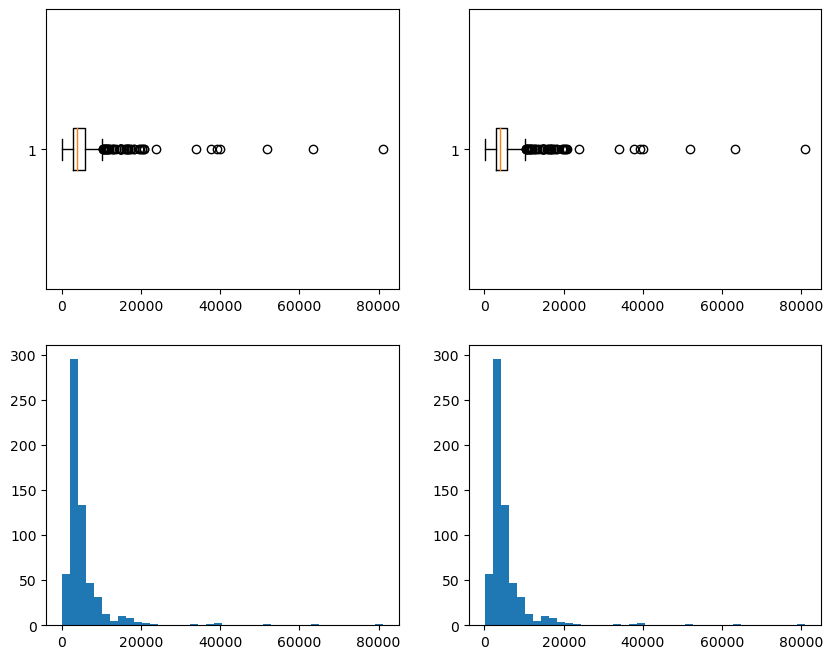

In [18]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.boxplot(loan_df['ApplicantIncome'],vert=False)
plt.subplot(2,2,2)
plt.boxplot(non_outliers_df['ApplicantIncome'],vert=False)
plt.subplot(2,2,3)
plt.hist(loan_df['ApplicantIncome'],bins=40)
plt.subplot(2,2,4)
plt.hist(non_outliers_df['ApplicantIncome'],bins=40)
plt.show()

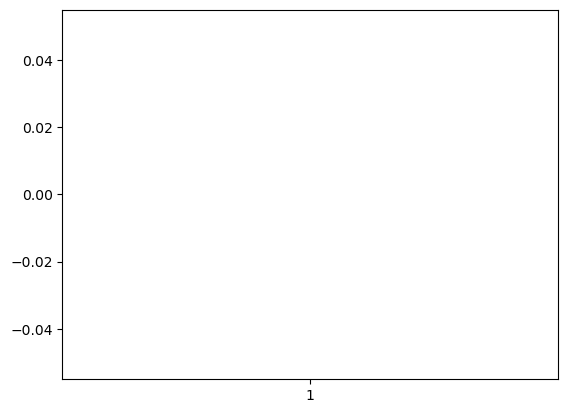

In [19]:
plt.boxplot(loan_df['Loan_Amount_Term'])
plt.show()

In [20]:
q1=np.quantile(loan_df['LoanAmount'],0.25)
q2=np.quantile(loan_df['LoanAmount'],0.50)
q3=np.quantile(loan_df['LoanAmount'],0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
################ outliers df
con1=loan_df['LoanAmount']>ub
con2=loan_df['LoanAmount']<lb
outliers_df=loan_df[con1|con2]
###################### No outliers df
# con11=loan_df['LoanAmount']<ub
# con22=loan_df['LoanAmount']>lb
# non_outliers_df=loan_df[con11|con22]
# len(non_outliers_df),len(outliers_df)


In [31]:
a=[5|3]

In [32]:
a

[7]